# Feature Extraction 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [13]:
df = pd.DataFrame(data=[{'text':'Hello my name is ketan ','output':1},
                        {'text':'I am from Rajasthan ','output':1}, 
                        {'text':'Hello my name is ketan ','output':1},
                       {'text':'i dont like alcohol','output':0}])
df

,text,output
0,Hello my name is ketan,1
1,I am from Rajasthan,1
2,Hello my name is ketan,1
3,i dont like alcohol,0


In [15]:
cv = CountVectorizer()
bow = cv.fit_transform(df['text'])
bow

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [16]:
cv.vocabulary_

{'hello': 4,
 'my': 8,
 'name': 9,
 'is': 5,
 'ketan': 6,
 'am': 1,
 'from': 3,
 'rajasthan': 10,
 'dont': 2,
 'like': 7,
 'alcohol': 0}

In [21]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 0 0 0 1 1 1 0 1 1 0]]
[[0 1 0 1 0 0 0 0 0 0 1]]
[[0 0 0 0 1 1 1 0 1 1 0]]
[[1 0 1 0 0 0 0 1 0 0 0]]


In [25]:
cv.transform(["hello my name is mfdwasjvib is ketan"]).toarray()

array([[0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0]], dtype=int64)

In [26]:
# Out of vocabluy solved 

In [27]:
# Binary True -> It will replace all frequency to one

In [29]:
cv = CountVectorizer(binary=True)
bow = cv.fit_transform(df['text'])
cv.transform(["hello my name is mfdwasjvib is ketan"]).toarray()

array([[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]], dtype=int64)

In [30]:
# If we are setting binary = True 
# then we are saying instead of going for frequency check that word is present or not.

In [31]:
# max_features = build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

# N Grams

In [50]:
# 1,1 -> uni grams
# 2,2 -> Bi-grams
# 1,2 -> uni + bi 
# 1,3 -> uni + bi + tri 
cv = CountVectorizer(ngram_range=(1,5))
bow = cv.fit_transform(df['text'])

In [51]:
cv.vocabulary_

{'hello': 9,
 'my': 19,
 'name': 23,
 'is': 14,
 'ketan': 16,
 'hello my': 10,
 'my name': 20,
 'name is': 24,
 'is ketan': 15,
 'hello my name': 11,
 'my name is': 21,
 'name is ketan': 25,
 'hello my name is': 12,
 'my name is ketan': 22,
 'hello my name is ketan': 13,
 'am': 1,
 'from': 7,
 'rajasthan': 26,
 'am from': 2,
 'from rajasthan': 8,
 'am from rajasthan': 3,
 'dont': 4,
 'like': 17,
 'alcohol': 0,
 'dont like': 5,
 'like alcohol': 18,
 'dont like alcohol': 6}

In [52]:
bow.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0]], dtype=int64)

# Tf - IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
# In tf-idf we can implement N grams
tf = TfidfVectorizer()
bow = tf.fit_transform(df['text'])

In [64]:
bow.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.4472136 , 0.        , 0.4472136 , 0.4472136 ,
        0.        ],
       [0.        , 0.57735027, 0.        , 0.57735027, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027],
       [0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.4472136 , 0.        , 0.4472136 , 0.4472136 ,
        0.        ],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.57735027, 0.        , 0.        ,
        0.        ]])

In [65]:
tf.vocabulary_

{'hello': 4,
 'my': 8,
 'name': 9,
 'is': 5,
 'ketan': 6,
 'am': 1,
 'from': 3,
 'rajasthan': 10,
 'dont': 2,
 'like': 7,
 'alcohol': 0}

In [66]:
tf.idf_

array([1.91629073, 1.91629073, 1.91629073, 1.91629073, 1.51082562,
       1.51082562, 1.51082562, 1.91629073, 1.51082562, 1.51082562,
       1.91629073])

In [69]:
bow[0].toarray()

array([[0.       , 0.       , 0.       , 0.       , 0.4472136, 0.4472136,
        0.4472136, 0.       , 0.4472136, 0.4472136, 0.       ]])

# Word Embeddings

In [71]:
!pip install gensim

In [93]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
from wget import download
import seaborn as sns

In [77]:
download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")

100% [....................................................................] 1647046227 / 1647046227

'GoogleNews-vectors-negative300.bin.gz'

In [83]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True,limit=500000)

In [86]:
model['cricket'].shape

(300,)

<AxesSubplot:>

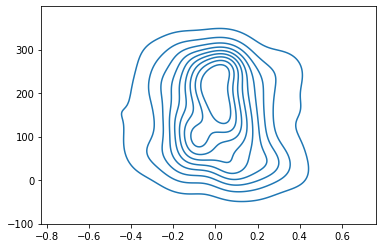

In [111]:
sns.kdeplot(x = list(model['hero']),y=range(0,300))

In [116]:
test = model['women'] + model['man']

In [117]:
model.most_similar(test)

[('men', 0.8264732360839844),
 ('women', 0.8245616555213928),
 ('woman', 0.7998167276382446),
 ('man', 0.779474139213562),
 ('teenage_girl', 0.5938074588775635),
 ('girl', 0.5803809762001038),
 ('girls', 0.5756489038467407),
 ('Women', 0.5630379915237427),
 ('ladies', 0.5611098408699036),
 ('teenager', 0.5546466708183289)]

In [118]:
model.similarity('man','woman')

0.76640123

In [120]:
model.similarity('man','PHP')

-0.032995153

In [125]:
model.doesnt_match(['man','person','PHP'])

'PHP'

In [130]:
vec = model['king'] - model['man'] + model['woman']

In [131]:
model.most_similar(vec)

[('king', 0.8449392318725586),
 ('queen', 0.7300518155097961),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613664388656616),
 ('sultan', 0.5376776456832886),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]